# Cats & Dogs identification using CNN

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [16]:
classifier=Sequential()

In [23]:
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [24]:
classifier.add(MaxPooling2D(2,2))

In [25]:
classifier.add(Conv2D(32,(3,3),activation="relu"))
classifier.add(MaxPooling2D(2,2))

In [26]:
classifier.add(Flatten())

In [31]:
classifier.add(Dense(units=128,activation="relu"))
classifier.add(Dense(units=1,activation="sigmoid"))

In [32]:
classifier.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")

In [33]:
from keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [35]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [37]:
training_set=train_datagen.flow_from_directory("C:/Users/Lohith/dataset/training_set",
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode="binary")
testing_set=test_datagen.flow_from_directory("C:/Users/Lohith/dataset/test_set",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode="binary")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [38]:
classifier.fit_generator(training_set,
                        steps_per_epoch=8000,
                        epochs=2,
                        validation_data=testing_set,
                        validation_steps=2000)

Epoch 1/2
8000/8000 [==============================] - 992s 124ms/step - loss: 0.3289 - accuracy: 0.8486 - val_loss: 0.7507 - val_accuracy: 0.7890
Epoch 2/2
8000/8000 [==============================] - 987s 123ms/step - loss: 0.1003 - accuracy: 0.9621 - val_loss: 0.7974 - val_accuracy: 0.7961


In [40]:
import matplotlib.image as mpimg

In [49]:
from keras.preprocessing import image

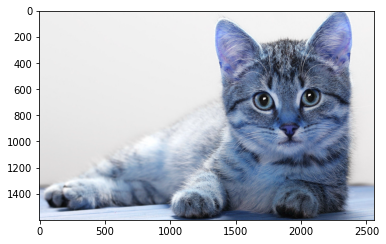

In [86]:
test_img=cv2.imread("cat_or_dog_2.jpg")
plt.imshow(test_img)

In [87]:
test_img=cv2.resize(test_img,(64,64))

In [88]:
test_img=image.img_to_array(test_img)

In [89]:
test_img=np.expand_dims(test_img,axis=0)

In [90]:
result=classifier.predict(test_img)

In [91]:
if result[0]==1:
    print("Image is Dog")
else:
    print("Image is Cat")

Image is Cat
